### What Are Embeddings?
Think of embeddings as a way to translate words into a language that computers understand - numbers!

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Simplified 2D example (real embeddings have hundreds of dimensions)
word_embeddings = {
    "cat": [0.8, 0.6],
    "kitten": [0.75, 0.65],
    "dog": [0.7, 0.3],
    "puppy": [0.65, 0.35],
    "car": [-0.5, 0.2],
    "truck": [-0.45, 0.15]
}

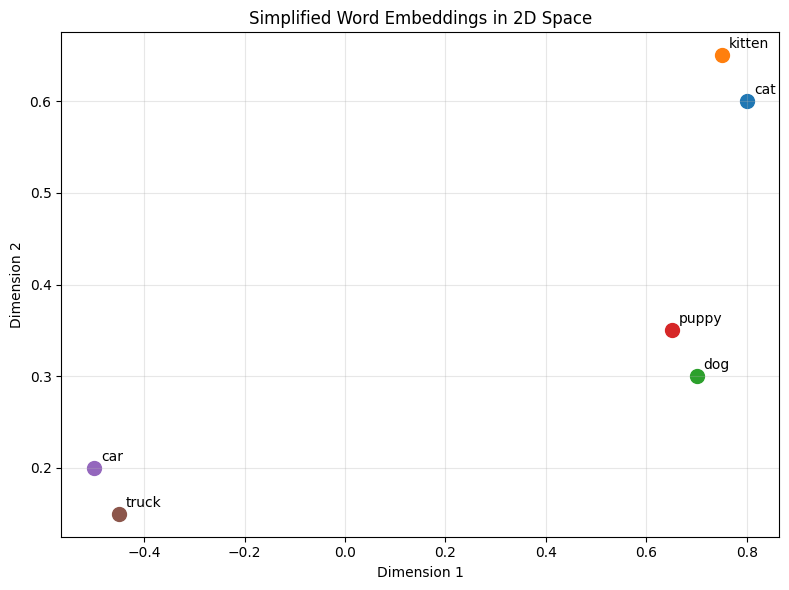

In [3]:
fig, ax = plt.subplots(figsize=(8, 6))

for word, coords in word_embeddings.items():
    ax.scatter(coords[0], coords[1], s=100)
    ax.annotate(word, (coords[0], coords[1]), xytext=(5, 5), 
                textcoords='offset points')

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_title('Simplified Word Embeddings in 2D Space')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Measuring Similarity

In [4]:
def cosine_similarity(vec1, vec2):
    """
    Cosine similarity measures the angle between two vectors.
    - Result close to 1: Very similar
    - Result close to 0: Not related
    - Result close to -1: Opposite meanings
    """

    dot_product=np.dot(vec1,vec2)
    norm_a=np.linalg.norm(vec1)
    norm_b=np.linalg.norm(vec2)
    return dot_product/(norm_a * norm_b)



In [6]:
# Example
cat_vector = [0.8, 0.6, 0.3]
kitten_vector = [0.75, 0.65, 0.35]
car_vector = [-0.5, 0.2, 0.1]

cat_kitten_similarity=cosine_similarity(cat_vector,kitten_vector)
print(cat_kitten_similarity)

0.9966186334192181


In [7]:
cosine_similarity(cat_vector,car_vector)

np.float64(-0.43718588548916804)

### Creating Your First Embeddings

In [8]:
### Huggingface And OpenAI Models

from langchain_huggingface import HuggingFaceEmbeddings

## Initialize a simple Embedding model(no API Key needed!)
embeddings=HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2"
)
embeddings

/Users/sharad/Documents/Code/project-repos/personal_rag/RAG-ProjPrep/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


HuggingFaceEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2', cache_folder=None, model_kwargs={}, encode_kwargs={}, query_encode_kwargs={}, multi_process=False, show_progress=False)

In [9]:
## create your first embeddings
text="Hello, I am learning about embeddings!"

embedding=embeddings.embed_query(text)
print(f"Text: {text}")
print(f"Embedding length : {len(embedding)}")
print(embedding)

Text: Hello, I am learning about embeddings!
Embedding length : 384
[-0.018163258209824562, -0.09955166280269623, 0.013816077262163162, -0.00812592450529337, 0.01415221393108368, 0.0640648752450943, -0.006253338884562254, -0.0030178693123161793, 0.025287242606282234, -0.020198652520775795, 0.024329761043190956, 0.07435060292482376, 0.05117715150117874, 0.022038448601961136, -0.05830619856715202, 0.01526825875043869, 0.02358436957001686, 0.09455399215221405, -0.06508848816156387, 0.013296680524945259, -0.020497571676969528, -0.05690855160355568, 0.0303033534437418, -0.08365612477064133, 0.026596317067742348, -0.015231441706418991, -0.043615393340587616, 0.053983986377716064, 0.09025714546442032, -0.08893878757953644, 0.03964455425739288, -0.008835033513605595, -0.030343735590577126, 0.07425563782453537, -0.054099176079034805, 0.11107999086380005, 0.0368998721241951, -0.008959800936281681, -0.06140241026878357, -0.0031433827243745327, 0.02195817418396473, 0.042208198457956314, -0.0289378

In [10]:
sentences = [
    "The cat sat on the mat",
    "The cat sat on the mat",
    "The dog played in the yard",
    "I love programming in Python",
    "Python is my favorite programming language"
]

embedding_sentence=embeddings.embed_documents(sentences)

print(embedding_sentence[0])
print(embedding_sentence[1])

[0.1304018497467041, -0.011870130896568298, -0.02811703272163868, 0.05123867094516754, -0.05597448721528053, 0.03019157238304615, 0.03016131930053234, 0.024698330089449883, -0.018370497971773148, 0.058766819536685944, -0.024953143671154976, 0.06015419587492943, 0.03983169049024582, 0.03323052078485489, -0.061311397701501846, -0.049373116344213486, -0.054863523691892624, -0.04007606953382492, 0.056429147720336914, 0.039156608283519745, -0.03473707288503647, -0.013247668743133545, 0.03196622058749199, -0.06349916011095047, -0.060178566724061966, 0.07823453843593597, -0.02830389328300953, -0.04744282364845276, 0.04035930335521698, -0.0066309235990047455, -0.06674100458621979, -0.004191359505057335, -0.025311684235930443, 0.05334164574742317, 0.01742808148264885, -0.097923643887043, 0.0060613094829022884, -0.06524160504341125, 0.045572541654109955, 0.02364182472229004, 0.07658478617668152, -0.010264326818287373, -0.004076771903783083, -0.06232282146811485, 0.03370515629649162, 0.0186611302

In [11]:
from langchain_huggingface import HuggingFaceEmbeddings
import time

# Popular models comparison
models = {
    "all-MiniLM-L6-v2": {
        "size": 384,
        "description": "Fast and efficient, good quality",
        "use_case": "General purpose, real-time applications"
    },
    "all-mpnet-base-v2": {
        "size": 768,
        "description": "Best quality, slower than MiniLM",
        "use_case": "When quality matters more than speed"
    },
    "all-MiniLM-L12-v2": {
        "size": 384,
        "description": "Slightly better than L6, bit slower",
        "use_case": "Good balance of speed and quality"
    },
    "multi-qa-MiniLM-L6-cos-v1": {
        "size": 384,
        "description": "Optimized for question-answering",
        "use_case": "Q&A systems, semantic search"
    },
    "paraphrase-multilingual-MiniLM-L12-v2": {
        "size": 384,
        "description": "Supports 50+ languages",
        "use_case": "Multilingual applications"
    }
}

print("📊 Popular Open Source Embedding Models:\n")
for model_name, info in models.items():
    print(f"Model: sentence-transformers/{model_name}")
    print(f"  📏 Embedding size: {info['size']} dimensions")
    print(f"  📝 Description: {info['description']}")
    print(f"  🎯 Use case: {info['use_case']}\n")


📊 Popular Open Source Embedding Models:

Model: sentence-transformers/all-MiniLM-L6-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Fast and efficient, good quality
  🎯 Use case: General purpose, real-time applications

Model: sentence-transformers/all-mpnet-base-v2
  📏 Embedding size: 768 dimensions
  📝 Description: Best quality, slower than MiniLM
  🎯 Use case: When quality matters more than speed

Model: sentence-transformers/all-MiniLM-L12-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Slightly better than L6, bit slower
  🎯 Use case: Good balance of speed and quality

Model: sentence-transformers/multi-qa-MiniLM-L6-cos-v1
  📏 Embedding size: 384 dimensions
  📝 Description: Optimized for question-answering
  🎯 Use case: Q&A systems, semantic search

Model: sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Supports 50+ languages
  🎯 Use case: Multilingual applications

